## Bitirme Projesi

Kütüphanleri import edelim:

In [801]:
#Kütüphaneleri import edelim:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

#Python'daki uyarıları kapatmak için:
import warnings
warnings.filterwarnings("ignore")

Verileri içeri aktaralım:

In [681]:
#Verileri içeri aktaralım:

customer_data = pd.read_csv("data/customers_dataset.csv")
geolocation_data = pd.read_csv("data/geolocation_dataset.csv")
items_data = pd.read_csv("data/order_items_dataset.csv")
payments_data = pd.read_csv("data/order_payments_dataset.csv")
reviews_data = pd.read_csv("data/order_reviews_dataset.csv")
orders_data = pd.read_csv("data/orders_dataset.csv")
translations_data = pd.read_csv("data/product_category_name_translation.csv")
products_data = pd.read_csv("data/products_dataset.csv")
sellers_data = pd.read_csv("data/sellers_dataset.csv")

Veri setleri hakkında özet ve faydalı bilgiler verebilecek bir fonksiyon tanımlayalım:

In [682]:
def info_func(data_name):
    print("••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••")
    data_name.info()
    print("\n")
    print("••••••••••••••••  Veri setindeki gözlem ve değişken sayısı: ", data_name.shape)
    print("\n")
    print("•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••••••••••")
    print(data_name.isnull().sum())

* Sayısal değişkenleri grafikte görebilmek adına bir fonksiyon tanımlayalım:

In [ ]:
def plotHistogram(degisken, n=5):
  """
    Girdi: Değişken/sütun ismi
    Çıktı: İlgili değişkenin histogramı
  """
  veri = items_data[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak içi 
  plt.figure()
  plt.hist(items_data[degisken], bins = 85, color = "salmon") #bins -> aralık, biz 85 olsun dedik
  plt.xlabel(degisken)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")

sayısal_degisken = ["siparis_adet", "urun_fiyat", "nakliye_ucreti"]

for i in sayısal_degisken:
  plotHistogram(i)

* Sayısal değişkenleri grafikte görebilmek adına bir fonksiyon tanımlayalım:

In [ ]:
def plotBar(degisken, n = 10):   #En çok görülen 10 değer
  
  """
  Girdi: Değişken/sütun ismi
  n = Gösterilecek eşsiz, en sık rastlanan değer sayısı
  Çıktı: Çubuk grafiği
  """

  veri = customer_data[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak için
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "aquamarine")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 90)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")

Örnek Analizler
1. Siparişlerin ortalama ne kadar tuttuğu.
2. Ödeme türlerinin birbirlerine oranı.
3. Aylara göre sipariş sayısı.
4. Hangi satıcının ne kadar ürün sattığı.
5. Hangi kategoriden ne kadar ürün satıldığı.

Öncelikle her bir veri setini inceleyelim:

### **1. customer_data**

In [683]:
info_func(customer_data)

••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


••••••••••••••••  Veri setindeki gözlem ve değişken sayısı:  (99441, 5)


•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••••••••••
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Bu veri setimizde 5 adet değişken bulunmakta. Bunların 4 tanesi kategorik, 1 tanesi ise sayısal değişken.

In [684]:
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [685]:
customer_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

##### 1.1 - Sütun İsimlerinin Düzenlenmesi

In [826]:
customer_data.rename(columns = {'customer_id':                  'musteri_id',
                                'customer_unique_id':           'musteri_essiz_id',
                                'customer_zip_code_prefix':     'musteri_posta_kodu',
                                'customer_city':                'musteri_sehir',
                                'customer_state':               'musteri_eyalet'
                                }, inplace = True)

customer_data

,musteri_id,musteri_essiz_id,musteri_posta_kodu,musteri_sehir,musteri_eyalet,musteri_adres
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,franca - SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,sao bernardo do campo - SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,sao paulo - SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,mogi das cruzes - SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,campinas - SP
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,sao paulo - SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,taboao da serra - SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fortaleza - CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,canoas - RS


In [687]:
customer_data.dtypes

musteri_id            object
musteri_essiz_id      object
musteri_posta_kodu     int64
musteri_sehir         object
musteri_eyalet        object
dtype: object

In [689]:
print("Satış yapılan şehir sayısı: ", len(customer_data.musteri_sehir.unique()))
print("Satış yapılan eyalet sayısı: ", len(customer_data.musteri_eyalet.unique()))

Satış yapılan şehir sayısı:  4119
Satış yapılan eyalet sayısı:  27


In [690]:
customer_data.musteri_essiz_id.unique()
print("Müşteri sayısı: ", len(customer_data.musteri_essiz_id.unique()))

Müşteri sayısı:  96096


In [691]:
#Eyalet başına düşen ortalama şehir sayısı

eyalet_sehir = customer_data.groupby(by = "musteri_eyalet").musteri_sehir.value_counts().mean()
print("Eyalet başına düşen ortalama şehir sayısı: ", np.round(eyalet_sehir))

Eyalet başına düşen ortalama şehir sayısı:  23.0


In [692]:
#Kategorik değişkeni sınıflarına parçaladık - musteri_eyalet

veri_gecici = customer_data.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns = ['musteri_eyalet'])
veri_gecici.head().iloc[:,3:].T

,0,1,2,3,4
musteri_sehir,franca,sao bernardo do campo,sao paulo,mogi das cruzes,campinas
musteri_eyalet_AC,0,0,0,0,0
musteri_eyalet_AL,0,0,0,0,0
musteri_eyalet_AM,0,0,0,0,0
musteri_eyalet_AP,0,0,0,0,0
musteri_eyalet_BA,0,0,0,0,0
musteri_eyalet_CE,0,0,0,0,0
musteri_eyalet_DF,0,0,0,0,0
musteri_eyalet_ES,0,0,0,0,0
musteri_eyalet_GO,0,0,0,0,0


In [693]:
#Yeni değişken eklemek:

customer_data["musteri_adres"] = customer_data.musteri_sehir + " - " + customer_data.musteri_eyalet

customer_data

,musteri_id,musteri_essiz_id,musteri_posta_kodu,musteri_sehir,musteri_eyalet,musteri_adres
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,franca - SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,sao bernardo do campo - SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,sao paulo - SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,mogi das cruzes - SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,campinas - SP
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,sao paulo - SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,taboao da serra - SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fortaleza - CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,canoas - RS


* Kategorik değişkenleri için grafik üzerinde görebilmek adına bir fonksiyon tanımlayalım:

In [694]:
def plotBar(degisken, n = 10):   #En çok görülen 10 değer
  
  veri = customer_data[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak için
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "aquamarine")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 90)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")

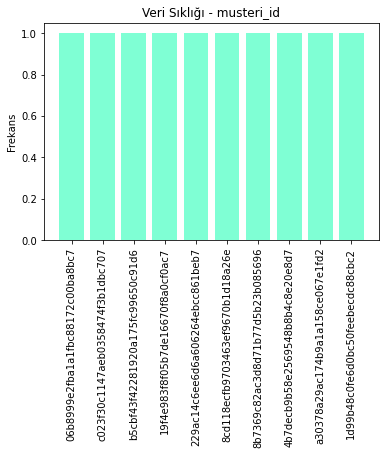

musteri_id:
06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
8cd118ecfb9703463ef9670b1d18a26e    1
8b7369c82ac3d8d71b77d5b23b085696    1
4b7decb9b58e2569548b8b4c8e20e8d7    1
a30378a29ac174b9a1a158ce067e1fd2    1
1d99b48c0fe6d0bc50feebecdc88cbc2    1
Name: musteri_id, dtype: int64


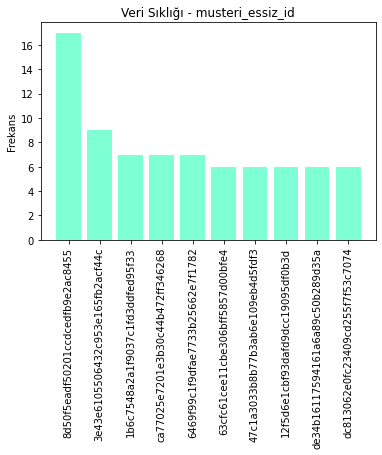

musteri_essiz_id:
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
63cfc61cee11cbe306bff5857d00bfe4     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
de34b16117594161a6a89c50b289d35a     6
dc813062e0fc23409cd255f7f53c7074     6
Name: musteri_essiz_id, dtype: int64


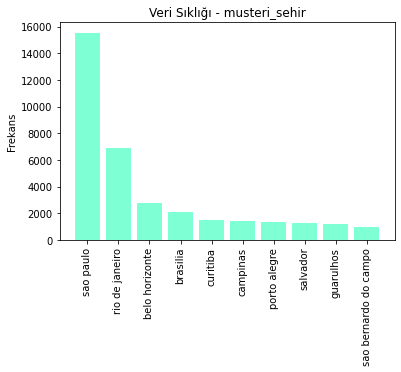

musteri_sehir:
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: musteri_sehir, dtype: int64


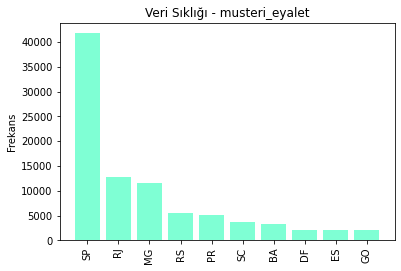

musteri_eyalet:
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: musteri_eyalet, dtype: int64


In [695]:
kategorik_degiskenler = ["musteri_id", "musteri_essiz_id", "musteri_sehir", "musteri_eyalet"]

for kategorik_degisken in kategorik_degiskenler:
  plotBar(kategorik_degisken)

* Sayısal değişkenleri grafik üzerinde görebilmek adına bir fonksiyon tanımlayalım:

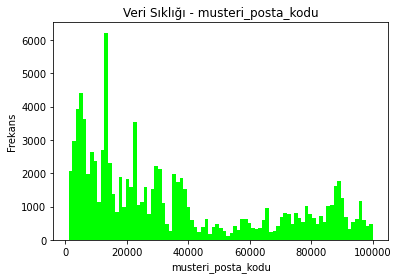

musteri_posta_kodu:
22790    142
24220    124
22793    121
24230    117
22775    110
Name: musteri_posta_kodu, dtype: int64


In [829]:
def plotHistogram(degisken, n=5):
  """
    Girdi: Değişken/sütun ismi
    Çıktı: İlgili değişkenin histogramı
  """
  veri = customer_data[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak için 
  plt.figure()
  plt.hist(customer_data[degisken], bins = 85, color = "lime") 
  plt.xlabel(degisken)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")

sayısal_degisken = ["musteri_posta_kodu"]

for i in sayısal_degisken:
  plotHistogram(i)

In [696]:
#Müşterilerin en az bulunduğu şehirler

en_az_sehir = customer_data['musteri_sehir'].value_counts(ascending = True)
en_az_sehir[:10]

eugenio de castro     1
monteiropolis         1
campo florido         1
alto sao joao         1
paulistania           1
taquarana             1
castanheiras          1
humberto de campos    1
nova brescia          1
chaval                1
Name: musteri_sehir, dtype: int64

In [697]:
#Müşterilerin en az bulunduğu eyaletler

en_az_eyalet = customer_data['musteri_eyalet'].value_counts(ascending = True)
en_az_eyalet[:10]

RR     46
AP     68
AC     81
AM    148
RO    253
TO    280
SE    350
AL    413
RN    485
PI    495
Name: musteri_eyalet, dtype: int64

##### **2. geolocation_data**

In [699]:
info_func(geolocation_data)

••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


••••••••••••••••  Veri setindeki gözlem ve değişken sayısı:  (1000163, 5)


•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••••••••••
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


##### 2.1 - Sütun İsimlerinin Düzenlenmesi

In [700]:
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [701]:
geolocation_data.rename(columns = { 'geolocation_zip_code_prefix': 'cografi_id',
                                    'geolocation_lat':             'enlem',
                                    'geolocation_lng':             'boylam',
                                    'geolocation_city':            'sehir',
                                    'geolocation_state':           'eyalet',
                                    }, inplace = True)

geolocation_data

,cografi_id,enlem,boylam,sehir,eyalet
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


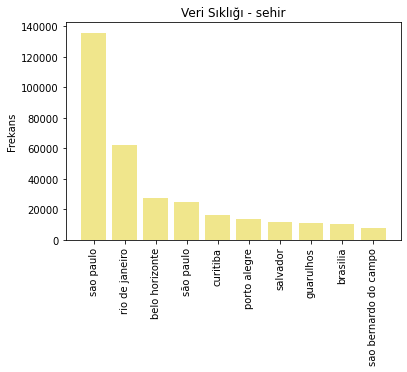

sehir:
sao paulo                135800
rio de janeiro            62151
belo horizonte            27805
são paulo                 24918
curitiba                  16593
porto alegre              13521
salvador                  11865
guarulhos                 11340
brasilia                  10470
sao bernardo do campo      8112
Name: sehir, dtype: int64


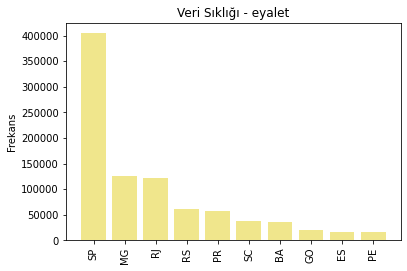

eyalet:
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
Name: eyalet, dtype: int64


In [831]:
def plotBar(degisken, n = 10):   #En çok görülen 10 değer

  veri = geolocation_data[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak için
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "khaki")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 90)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")


geo_kategorik_degiskenler = ['sehir', 'eyalet']

for i in geo_kategorik_degiskenler:
  plotBar(i)

<AxesSubplot: >

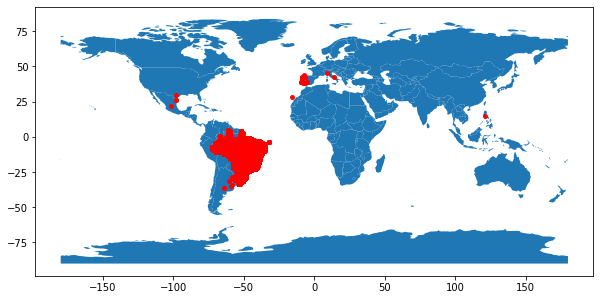

In [703]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(geolocation_data['boylam'], geolocation_data['enlem'])]
gdf = GeoDataFrame(geolocation_data, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

### **3. items_data**

In [705]:
info_func(items_data)

••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


••••••••••••••••  Veri setindeki gözlem ve değişken sayısı:  (112650, 7)


•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••••••••••
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                

In [704]:
items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [706]:
items_data.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

##### 3.1 - Sütun İsimlerinin Düzenlenmesi

In [707]:
items_data.rename(columns = {'order_id':            'siparis_id',
                            'order_item_id':        'siparis_adet',
                            'product_id':           'urun_id',
                            'seller_id':            'satici_id',
                            'shipping_limit_date':  'nakliye_son_tarih',
                            'price':                'urun_fiyat',
                            'freight_value':        'nakliye_ucreti'
                            }, inplace = True)

items_data.head(2)

,siparis_id,siparis_adet,urun_id,satici_id,nakliye_son_tarih,urun_fiyat,nakliye_ucreti
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [832]:
#Ortalama nakliye ücreti:

ort_nakliye_ucreti = np.round(items_data["nakliye_ucreti"].mean())
print("Ortalama nakliye ücreti: ", ort_nakliye_ucreti)

Ortalama nakliye ücreti:  20.0


In [833]:
#Ürünlerin ortalama fiyatı:

ort_urun_fiyat = np.round(items_data["urun_fiyat"].mean())
print("Ortalama ürün fiyatı: ", ort_urun_fiyat)

Ortalama ürün fiyatı:  121.0


In [710]:
items_data.dtypes

siparis_id            object
siparis_adet           int64
urun_id               object
satici_id             object
nakliye_son_tarih     object
urun_fiyat           float64
nakliye_ucreti       float64
dtype: object

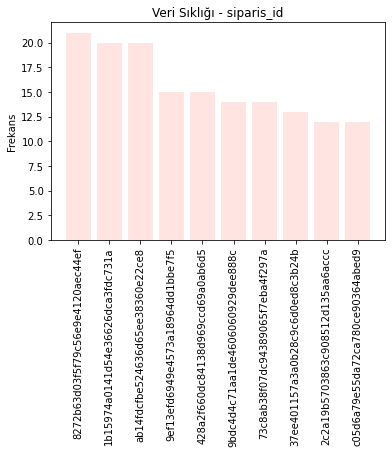

siparis_id:
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
9bdc4d4c71aa1de4606060929dee888c    14
73c8ab38f07dc94389065f7eba4f297a    14
37ee401157a3a0b28c9c6d0ed8c3b24b    13
2c2a19b5703863c908512d135aa6accc    12
c05d6a79e55da72ca780ce90364abed9    12
Name: siparis_id, dtype: int64


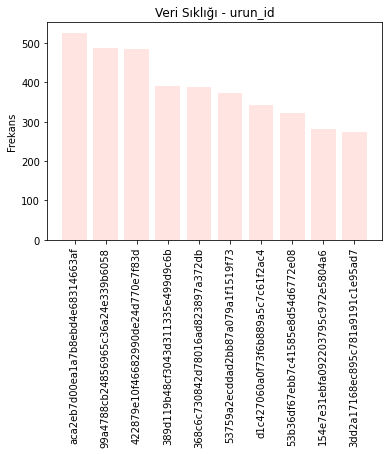

urun_id:
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: urun_id, dtype: int64


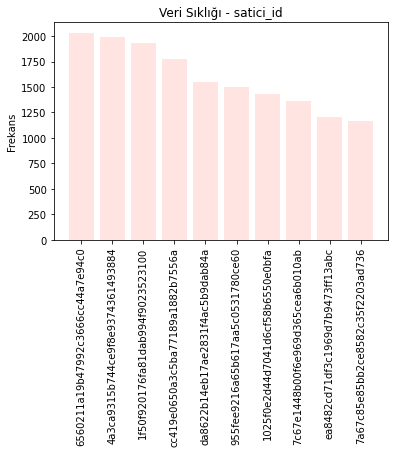

satici_id:
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1499
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1203
7a67c85e85bb2ce8582c35f2203ad736    1171
Name: satici_id, dtype: int64


In [824]:
def plotBar(degisken, n = 10):   #En çok görülen 10 değer

  veri = items_data[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak için
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "mistyrose")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 90)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")


urun_kategorik_degiskenler = ['siparis_id', 'urun_id', 'satici_id']

for i in urun_kategorik_degiskenler:
  plotBar(i)

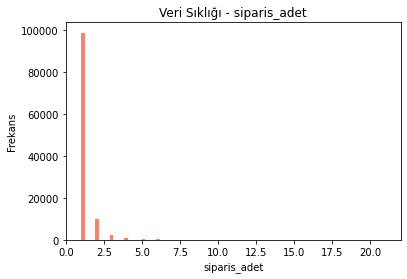

siparis_adet:
1    98666
2     9803
3     2287
4      965
5      460
Name: siparis_adet, dtype: int64


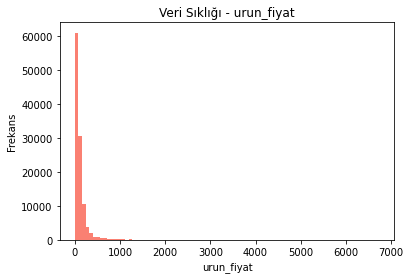

urun_fiyat:
59.90     2481
69.90     1987
49.90     1953
89.90     1548
99.90     1432
          ... 
196.90       4
84.80        4
669.65       4
116.50       4
5.00         4
Name: urun_fiyat, Length: 2103, dtype: int64


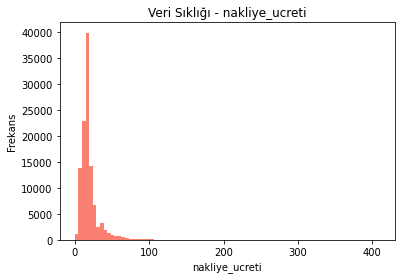

nakliye_ucreti:
15.10    3707
7.78     2262
14.10    1875
11.85    1846
18.23    1575
         ... 
55.76       2
53.35       2
3.71        2
90.95       2
5.00        2
Name: nakliye_ucreti, Length: 4565, dtype: int64


In [713]:
def plotHistogram(degisken, n=5):
 
  veri = items_data[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak için
  plt.figure()
  plt.hist(items_data[degisken], bins = 85, color = "salmon") 
  plt.xlabel(degisken)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")

sayısal_degisken = ["siparis_adet", "urun_fiyat", "nakliye_ucreti"]

for i in sayısal_degisken:
  plotHistogram(i)

### **4. payments_data**

In [772]:
info_func(payments_data)

••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


••••••••••••••••  Veri setindeki gözlem ve değişken sayısı:  (103886, 5)


•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••••••••••
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [773]:
payments_data.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [774]:
payments_data.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [775]:
payments_data.rename(columns = {'order_id':                 'siparis_id',
                                'payment_sequential':       'odeme_seq',
                                'payment_type':             'odeme_sekli',
                                'payment_installments':     'taksit_sayisi',
                                'payment_value':            'odeme_degeri'
                                }, inplace = True)

payments_data.head(2)

,siparis_id,odeme_seq,odeme_sekli,taksit_sayisi,odeme_degeri
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


* Siparişlerin ortalama değeri:

In [834]:
siparis_ortalama = np.round(payments_data.odeme_degeri.mean())

print("Siparişlerin ortalama değeri: ", siparis_ortalama)

Siparişlerin ortalama değeri:  154.0


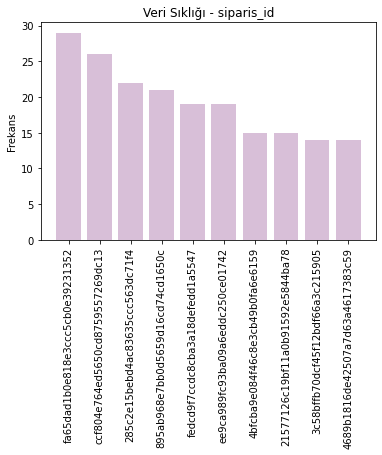

siparis_id:
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
ee9ca989fc93ba09a6eddc250ce01742    19
4bfcba9e084f46c8e3cb49b0fa6e6159    15
21577126c19bf11a0b91592e5844ba78    15
3c58bffb70dcf45f12bdf66a3c215905    14
4689b1816de42507a7d63a4617383c59    14
Name: siparis_id, dtype: int64


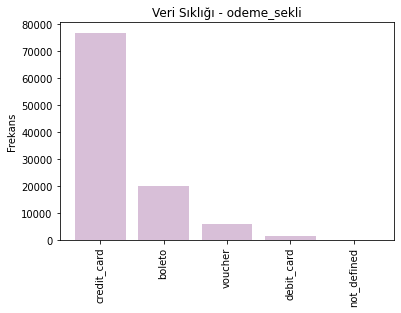

odeme_sekli:
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: odeme_sekli, dtype: int64


In [770]:
def plotBar(degisken, n = 10):   #En çok görülen 10 değer
  
  """
  Girdi: Değişken/sütun ismi
  n = Gösterilecek eşsiz, en sık rastlanan değer sayısı
  Çıktı: Çubuk grafiği
  """

  veri = payments_data[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak için
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "thistle")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 90)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")


odeme_kategorik_degiskenler = ['siparis_id', 'odeme_sekli']

for i in odeme_kategorik_degiskenler:
  plotBar(i)

In [787]:
payments_data.groupby("odeme_sekli").size()

odeme_sekli
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
dtype: int64

<AxesSubplot: ylabel='odeme_sekli'>

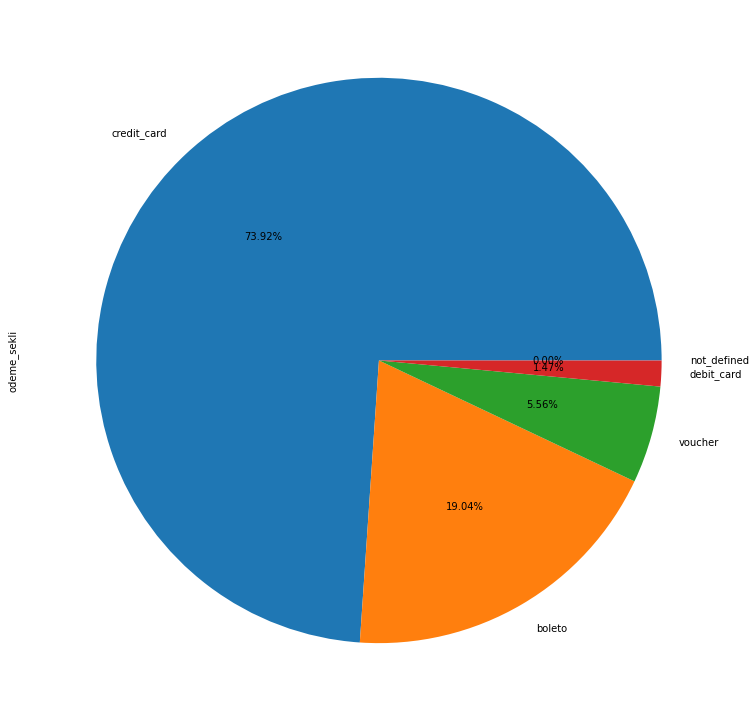

In [819]:
#Ödeme türlerinin birbirine oranı

payments_data['odeme_sekli'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(13, 13))

In [793]:
payments_data.groupby("taksit_sayisi")["odeme_degeri"].value_counts(ascending = True)

#Taksit sayısı 24 aya kadar devam ediyor.

taksit_sayisi  odeme_degeri
0              58.69           1
               129.94          1
1              0.07            1
               0.09            1
               0.16            1
                              ..
24             756.49          1
               771.69          1
               1099.00         1
               1194.38         1
               1440.10         1
Name: odeme_degeri, Length: 54530, dtype: int64

In [838]:
payments_data.groupby("taksit_sayisi")["odeme_degeri"].describe().T

taksit_sayisi,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,20,21,22,23,24
count,2.000000,52546.000000,12413.00000,10461.000000,7098.000000,5239.000000,3920.000000,1626.000000,4268.000000,644.000000,...,15.000000,74.000000,5.000000,8.000000,27.000000,17.000000,3.000000,1.00,1.00,18.000000
mean,94.315000,112.420229,127.22815,142.539317,163.976840,183.465222,209.849952,187.673672,307.737427,203.440870,...,167.962667,445.553108,292.694000,174.602500,486.483333,615.801765,243.700000,228.71,236.48,610.048889
std,50.381358,177.556132,112.15216,132.786159,172.063538,208.763354,220.513228,201.988654,330.234401,199.236704,...,70.583457,449.540186,211.546161,2.650476,367.222596,483.356363,51.411933,NaN,NaN,342.152398
min,58.690000,0.000000,20.03000,30.000000,40.000000,49.990000,59.990000,69.970000,37.580000,90.110000,...,139.980000,151.930000,160.120000,170.000000,180.760000,200.080000,212.030000,228.71,236.48,241.420000
25%,76.502500,43.310000,64.00000,67.220000,71.462500,75.210000,80.190000,76.765000,130.150000,95.317500,...,144.665000,196.500000,164.170000,173.022500,228.770000,274.640000,214.040000,228.71,236.48,330.375000
50%,94.315000,73.340000,109.42000,110.420000,117.175000,125.970000,138.550000,140.075000,212.695000,99.920000,...,147.070000,255.850000,167.370000,175.100000,335.890000,458.310000,216.050000,228.71,236.48,593.880000
75%,112.127500,127.367500,155.73000,175.600000,207.297500,223.725000,242.485000,193.390000,358.455000,212.102500,...,149.620000,429.915000,320.760000,176.215000,526.140000,811.320000,259.535000,228.71,236.48,724.777500
max,129.940000,13664.080000,2442.82000,3256.140000,3126.500000,4809.440000,2828.420000,2094.440000,6929.310000,2116.010000,...,417.450000,2647.760000,651.050000,177.990000,1232.850000,2022.330000,303.020000,228.71,236.48,1440.100000


### **5. reviews_data**

In [719]:
info_func(reviews_data)

••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


••••••••••••••••  Veri setindeki gözlem ve değişken sayısı:  (99224, 7)


•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••••••••••
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comm

In [720]:
reviews_data.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [721]:
reviews_data.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [722]:
reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [723]:
yorumlar = reviews_data.copy()

In [724]:
yorumlar.drop(["review_comment_title", "review_comment_message"], axis = 1, inplace = True)
yorumlar.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [725]:
yorumlar.rename(columns = {'review_id':                 'yorum_id',
                           'order_id':                  'siparis_id',
                           'review_score':              'yorum_puan',
                           'review_creation_date':      'yorum_olusturma_tarihi',
                           'review_answer_timestamp':   'yoruma_donus_tarihi'
                           }, inplace = True)

yorumlar.head()

,yorum_id,siparis_id,yorum_puan,yorum_olusturma_tarihi,yoruma_donus_tarihi
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [726]:
yorumlar.dtypes

yorum_id                  object
siparis_id                object
yorum_puan                 int64
yorum_olusturma_tarihi    object
yoruma_donus_tarihi       object
dtype: object

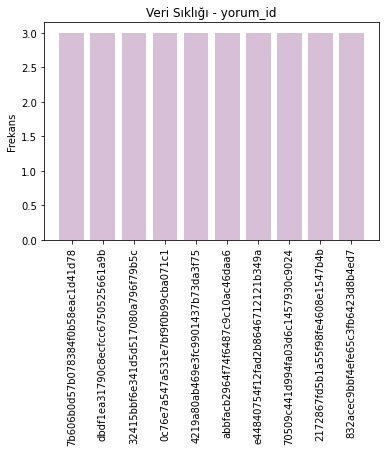

yorum_id:
7b606b0d57b078384f0b58eac1d41d78    3
dbdf1ea31790c8ecfcc6750525661a9b    3
32415bbf6e341d5d517080a796f79b5c    3
0c76e7a547a531e7bf9f0b99cba071c1    3
4219a80ab469e3fc9901437b73da3f75    3
abbfacb2964f74f6487c9c10ac46daa6    3
e44840754f12fad2b8646712121b349a    3
70509c441d994fa03d6c1457930c9024    3
2172867fd5b1a55f98fe4608e1547b4b    3
832acec9bbf4efe65c3fb6423d8b4ed7    3
Name: yorum_id, dtype: int64


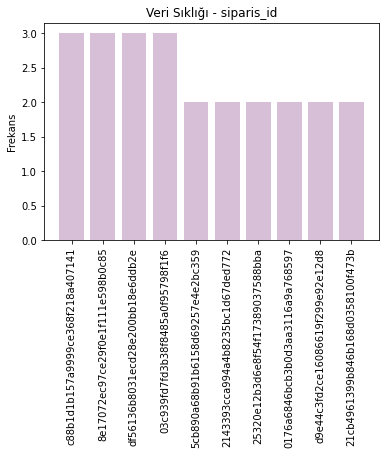

siparis_id:
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
2143393cca994a4b8235bc1d67ded772    2
25320e12b3d6e8f54f17389037588bba    2
0176a6846bcb3b0d3aa3116a9a768597    2
d9e44c3fd2ce16086619f299e92e12d8    2
21cb4961399b846b168d0358100f473b    2
Name: siparis_id, dtype: int64


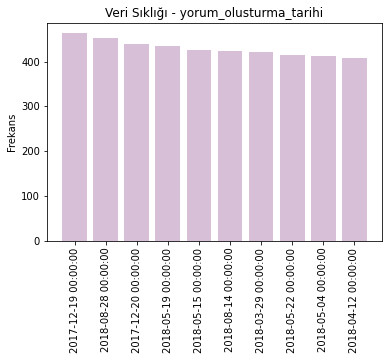

yorum_olusturma_tarihi:
2017-12-19 00:00:00    463
2018-08-28 00:00:00    452
2017-12-20 00:00:00    440
2018-05-19 00:00:00    434
2018-05-15 00:00:00    425
2018-08-14 00:00:00    423
2018-03-29 00:00:00    421
2018-05-22 00:00:00    414
2018-05-04 00:00:00    412
2018-04-12 00:00:00    408
Name: yorum_olusturma_tarihi, dtype: int64


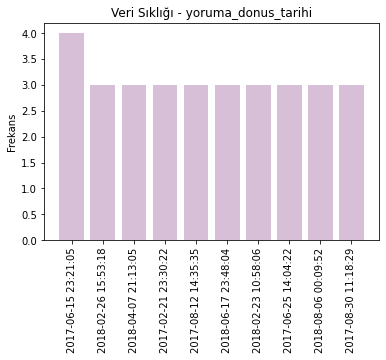

yoruma_donus_tarihi:
2017-06-15 23:21:05    4
2018-02-26 15:53:18    3
2018-04-07 21:13:05    3
2017-02-21 23:30:22    3
2017-08-12 14:35:35    3
2018-06-17 23:48:04    3
2018-02-23 10:58:06    3
2017-06-25 14:04:22    3
2018-08-06 00:09:52    3
2017-08-30 11:18:29    3
Name: yoruma_donus_tarihi, dtype: int64


In [727]:
def plotBar(degisken, n = 10):   #En çok görülen 10 değer
  
  """
  Girdi: Değişken/sütun ismi
  n = Gösterilecek eşsiz, en sık rastlanan değer sayısı
  Çıktı: Çubuk grafiği
  """

  veri = yorumlar[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak için
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "thistle")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 90)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")


yorum_kategorik_degiskenler = ['yorum_id', 'siparis_id', 'yorum_olusturma_tarihi', 'yoruma_donus_tarihi']

for i in yorum_kategorik_degiskenler:
  plotBar(i)

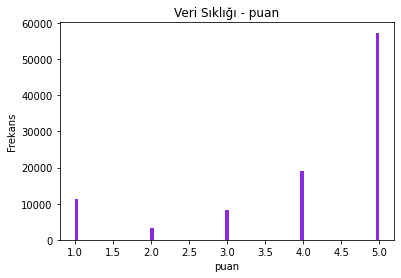

0        4
1        5
2        5
3        5
4        5
        ..
99219    5
99220    5
99221    5
99222    4
99223    1
Name: yorum_puan, Length: 99224, dtype: int64:
5    57328
4    19142
1    11424
3     8179
2     3151
Name: yorum_puan, dtype: int64


In [728]:
def plotHistogram(degisken, n = 10):
  """
    Girdi: Değişken/sütun ismi
    Çıktı: İlgili değişkenin histogramı
  """

  veri_sayma = yorumlar.yorum_puan.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak içi 
  plt.figure()
  plt.hist(yorumlar.yorum_puan, bins = 85, color = "blueviolet") #bins -> aralık, biz 85 olsun dedik
  plt.xlabel("puan")
  plt.ylabel("Frekans")
  plt.title("Veri Sıklığı - puan")
  plt.show()
  print(f"{yorumlar.yorum_puan}:\n{veri_sayma}")

plotHistogram(yorumlar.yorum_puan)

### **6. orders_data**

In [729]:
info_func(orders_data)

••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


••••••••••••••••  Veri setindeki gözlem ve değişken sayısı:  (99441, 8)


•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••••••••••
order_id                            0
cu

In [730]:
orders_data.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [731]:
orders_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [732]:
orders_data.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [733]:
orders_data.rename(columns = {'order_id':                       'siparis_id',
                             'customer_id':                     'musteri_id',
                             'order_status':                    'siparis_durumu',
                             'order_purchase_timestamp':        'siparis_verme_tarihi',
                             'order_approved_at':               'siparis_onaylanma_tarihi',
                             'order_delivered_carrier_date':    'siparis_yola_cikis_tarihi',
                             'order_delivered_customer_date':   'siparis_teslim_tarihi',
                             'order_estimated_delivery_date':   'tahmini_teslim_tarihi'
                             }, inplace = True)

orders_data.head(2)

,siparis_id,musteri_id,siparis_durumu,siparis_verme_tarihi,siparis_onaylanma_tarihi,siparis_yola_cikis_tarihi,siparis_teslim_tarihi,tahmini_teslim_tarihi
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [734]:
siparisler = orders_data.copy()
siparisler.dropna(subset=['siparis_onaylanma_tarihi', 'siparis_yola_cikis_tarihi', 'siparis_teslim_tarihi'], axis=0, inplace=True)
siparisler

,siparis_id,musteri_id,siparis_durumu,siparis_verme_tarihi,siparis_onaylanma_tarihi,siparis_yola_cikis_tarihi,siparis_teslim_tarihi,tahmini_teslim_tarihi
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [735]:
print(siparisler.isnull().sum())

print("Veri setinin eski şekli: ", orders_data.shape)
print("Veri setinin yeni şekli: ", siparisler.shape)

siparis_id                   0
musteri_id                   0
siparis_durumu               0
siparis_verme_tarihi         0
siparis_onaylanma_tarihi     0
siparis_yola_cikis_tarihi    0
siparis_teslim_tarihi        0
tahmini_teslim_tarihi        0
dtype: int64
Veri setinin eski şekli:  (99441, 8)
Veri setinin yeni şekli:  (96461, 8)


In [736]:
siparisler.siparis_durumu.value_counts()

delivered    96455
canceled         6
Name: siparis_durumu, dtype: int64

In [737]:
siparisler.groupby("siparis_durumu")["siparis_teslim_tarihi"]

In [738]:
from datetime import datetime as dt

siparisler['siparis_onay_dk'] = (((pd.to_datetime(siparisler.siparis_onaylanma_tarihi) - pd.to_datetime(siparisler.siparis_verme_tarihi)).dt.seconds) / 60)
siparisler['siparis_cikis_gun'] = (pd.to_datetime(siparisler.siparis_yola_cikis_tarihi) - pd.to_datetime(siparisler.siparis_onaylanma_tarihi)).dt.days
siparisler['siparis_teslim_gun'] = (pd.to_datetime(siparisler.siparis_teslim_tarihi) - pd.to_datetime(siparisler.siparis_yola_cikis_tarihi)).dt.days
siparisler['erken_teslim_gun'] = (pd.to_datetime(siparisler.tahmini_teslim_tarihi) - pd.to_datetime(siparisler.siparis_teslim_tarihi)).dt.days

In [739]:
print(f"Siparişlerin onaylanması için geçen ortalama süre: {np.round(siparisler.siparis_onay_dk.mean())} dakika")
print(f"Siparişlerin yola çıkması için geçen ortalama süre: {np.round(siparisler.siparis_cikis_gun.mean())} gün")
print(f"Siparişlerin teslim edilmesi için geçen ortalama süre: {np.round(siparisler.siparis_teslim_gun.mean())} gün")
print(f"Tahmini teslim tarihi ile gerçekleşen teslim arasındaki süre: {np.round(siparisler.erken_teslim_gun.mean())} gün")

Siparişlerin onaylanması için geçen ortalama süre: 236.0 dakika
Siparişlerin yola çıkması için geçen ortalama süre: 2.0 gün
Siparişlerin teslim edilmesi için geçen ortalama süre: 9.0 gün
Tahmini teslim tarihi ile gerçekleşen teslim arasındaki süre: 11.0 gün


### **7. translations_data**

In [740]:
translations_data = pd.read_csv("data/product_category_name_translation.csv")

In [741]:
info_func(translations_data)

••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


••••••••••••••••  Veri setindeki gözlem ve değişken sayısı:  (71, 2)


•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••••••••••
product_category_name            0
product_category_name_english    0
dtype: int64


In [742]:
translations_data.rename(columns = {'product_category_name':           'urun_kategori_pt',
                                    'product_category_name_english':   'urun_kategori_en'
                                    }, inplace = True)

translations_data["portekizce_ingilizce"] = translations_data["urun_kategori_pt"] + " : " + translations_data["urun_kategori_en"]
translations_data.head()

,urun_kategori_pt,urun_kategori_en,portekizce_ingilizce
0,beleza_saude,health_beauty,beleza_saude : health_beauty
1,informatica_acessorios,computers_accessories,informatica_acessorios : computers_accessories
2,automotivo,auto,automotivo : auto
3,cama_mesa_banho,bed_bath_table,cama_mesa_banho : bed_bath_table
4,moveis_decoracao,furniture_decor,moveis_decoracao : furniture_decor


In [743]:
"""
#replace the product categorie names to english
#products = pd.read_csv("olist_products_dataset.csv")
urunler = products_data.copy()

#prod_cat_name_tr = pd.read_csv("product_category_name_translation.csv")
ceviri = translations_data.copy()

urunler = urunler.merge(ceviri, on = "product_category_name", how = 'left')
urunler.drop("product_category_name", axis = 1, inplace=True)
urunler
"""

'\n#replace the product categorie names to english\n#products = pd.read_csv("olist_products_dataset.csv")\nurunler = products_data.copy()\n\n#prod_cat_name_tr = pd.read_csv("product_category_name_translation.csv")\nceviri = translations_data.copy()\n\nurunler = urunler.merge(ceviri, on = "product_category_name", how = \'left\')\nurunler.drop("product_category_name", axis = 1, inplace=True)\nurunler\n'

In [744]:
"""
urunler.isnull().sum()
urunler.shape
"""

'\nurunler.isnull().sum()\nurunler.shape\n'

### **8. products_data**

In [745]:
info_func(products_data)

••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


••••••••••••••••  Veri setindeki gözlem ve değişken sayısı:  (32951, 9)


•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••

In [746]:
products_data.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [747]:
urunler = products_data.copy()

urunler.dropna(subset = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                        'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=0, inplace=True)

urunler.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [748]:
urunler.rename(columns = {  'product_id':                   'urun_id',
                            'product_category_name':        'urun_kategori_pt',
                            'product_name_lenght':          'urun_adi_uzunluk',
                            'product_description_lenght':   'urun_aciklama_uzunluk',
                            'product_photos_qty':           'urun_fotograf_sayisi',
                            'product_weight_g':             'urun_agirlik_gram',
                            'product_length_cm':            'urun_uzunluk_cm',
                            'product_height_cm':            'urun_yukseklik_cm',
                            'product_width_cm':             'urun_genislik_cm'
                            }, inplace = True)

urunler.head(3)

,urun_id,urun_kategori_pt,urun_adi_uzunluk,urun_aciklama_uzunluk,urun_fotograf_sayisi,urun_agirlik_gram,urun_uzunluk_cm,urun_yukseklik_cm,urun_genislik_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [749]:
urunler.isnull().sum()

urun_id                  0
urun_kategori_pt         0
urun_adi_uzunluk         0
urun_aciklama_uzunluk    0
urun_fotograf_sayisi     0
urun_agirlik_gram        0
urun_uzunluk_cm          0
urun_yukseklik_cm        0
urun_genislik_cm         0
dtype: int64

In [750]:
urunler.dtypes

urun_id                   object
urun_kategori_pt          object
urun_adi_uzunluk         float64
urun_aciklama_uzunluk    float64
urun_fotograf_sayisi     float64
urun_agirlik_gram        float64
urun_uzunluk_cm          float64
urun_yukseklik_cm        float64
urun_genislik_cm         float64
dtype: object

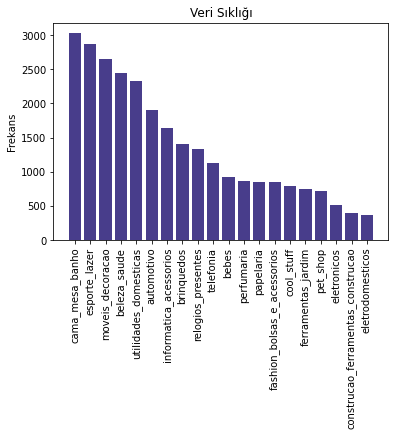

In [751]:
#En çok satılan ürün kategorileri:

veri = urunler['urun_kategori_pt']
veri_sayma = veri.value_counts()
veri_sayma = veri_sayma[:20] #İlk n tanesini almak için
plt.figure()
plt.bar(veri_sayma.index, veri_sayma, color = "darkslateblue")
plt.xticks(rotation = 90)
plt.ylabel("Frekans")
plt.title(f"Veri Sıklığı")
plt.show()

In [752]:
#urunler.urun_kategori_pt.value_counts().sort_values(ascending=True)
en_cok_satanlar = urunler['urun_kategori_pt'].value_counts().reset_index().nlargest(10, 'urun_kategori_pt')
en_cok_satanlar

,index,urun_kategori_pt
0,cama_mesa_banho,3029
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
5,automotivo,1900
6,informatica_acessorios,1639
7,brinquedos,1411
8,relogios_presentes,1329
9,telefonia,1134


### **9. sellers_data**

In [753]:
info_func(sellers_data)

••••••••••••••••••  Veri Seti Hakkında Özet Bilgiler  ••••••••••••••••••
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


••••••••••••••••  Veri setindeki gözlem ve değişken sayısı:  (3095, 4)


•••••••••••••••••••••••••  Boş Değer Kontrolü  •••••••••••••••••••••••••
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [754]:
sellers_data.rename(columns = {'seller_id':                  'satici_id',
                                'seller_zip_code_prefix':    'satici_posta_kodu',
                                'seller_city':               'satici_sehir',
                                'seller_state':              'satici_eyalet'
                            }, inplace = True)

sellers_data.head()

,satici_id,satici_posta_kodu,satici_sehir,satici_eyalet
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


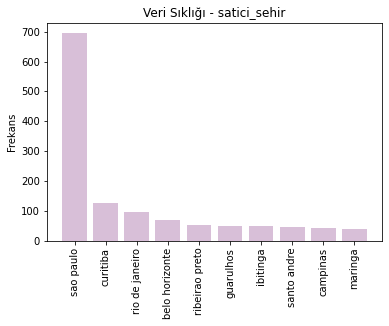

satici_sehir:
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: satici_sehir, dtype: int64


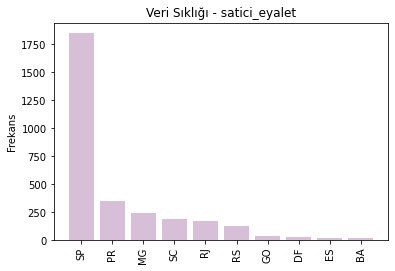

satici_eyalet:
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: satici_eyalet, dtype: int64


In [755]:
def plotBar(degisken, n = 10):   #En çok görülen 10 değer
  
  """
  Girdi: Değişken/sütun ismi
  n = Gösterilecek eşsiz, en sık rastlanan değer sayısı
  Çıktı: Çubuk grafiği
  """

  veri = sellers_data[degisken]
  veri_sayma = veri.value_counts()
  veri_sayma = veri_sayma[:n] #İlk n tanesini almak için
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "thistle")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 90)
  plt.ylabel("Frekans")
  plt.title(f"Veri Sıklığı - {degisken}")
  plt.show()
  print(f"{degisken}:\n{veri_sayma}")


satici_kategorik_degiskenler = ['satici_sehir', 'satici_eyalet']

for i in satici_kategorik_degiskenler:
  plotBar(i)

#### merge işlemleri

merg_data = pd.merge(customer, siparisler, on = "musteri_id")
merg_data = merg_data.merge(customer_data, on = "musteri_id")
merg_data = merg_data.merge(siparisler, on = "siparis_id")
merg_data = merg_data.merge(urunler, on = "urun_id")
merg_data = merg_data.merge(translations_data, on = "urun_kategori_pt")
merg_data.head()

In [756]:
merg_data = pd.merge(customer_data, siparisler, on = "musteri_id")
merg_data.head()

,musteri_id,musteri_essiz_id,musteri_posta_kodu,musteri_sehir,musteri_eyalet,musteri_adres,siparis_id,siparis_durumu,siparis_verme_tarihi,siparis_onaylanma_tarihi,siparis_yola_cikis_tarihi,siparis_teslim_tarihi,tahmini_teslim_tarihi,siparis_onay_dk,siparis_cikis_gun,siparis_teslim_gun,erken_teslim_gun
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,franca - SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,16.616667,6,1,10
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,sao bernardo do campo - SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,10.133333,2,13,7
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,sao paulo - SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,11.416667,21,3,-2
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,mogi das cruzes - SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,82.683333,14,0,12
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,campinas - SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,18.650000,1,10,5


In [757]:
merg_data2 = pd.merge(yorumlar, siparisler, on = "siparis_id")
merg_data2

,yorum_id,siparis_id,yorum_puan,yorum_olusturma_tarihi,yoruma_donus_tarihi,musteri_id,siparis_durumu,siparis_verme_tarihi,siparis_onaylanma_tarihi,siparis_yola_cikis_tarihi,siparis_teslim_tarihi,tahmini_teslim_tarihi,siparis_onay_dk,siparis_cikis_gun,siparis_teslim_gun,erken_teslim_gun
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,17.166667,1,4,15
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,23.333333,2,7,4
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,37.316667,3,10,20
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,14.100000,0,9,19
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00,289.300000,5,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96339,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20 00:00:00,1439.266667,0,6,13
96340,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00,22.616667,3,0,11
96341,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00,15.750000,1,1,15
96342,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00,88.016667,2,4,15


In [758]:
#Sipariş durumuna göre ürün puanı

merg_data2.groupby("siparis_durumu")["yorum_puan"].mean()

siparis_durumu
canceled     2.00000
delivered    4.15565
Name: yorum_puan, dtype: float64

In [759]:
merg_data2.groupby("siparis_durumu")["yorum_puan"].describe()

,count,mean,std,min,25%,50%,75%,max
siparis_durumu,,,,,,,,
canceled,6.0,2.00000,1.673320,1.0,1.0,1.0,2.5,5.0
delivered,96338.0,4.15565,1.285028,1.0,4.0,5.0,5.0,5.0


In [760]:
merg_data3 = pd.merge(items_data, payments_data, on = "siparis_id")
merg_data3.head(3)

,siparis_id,siparis_adet,urun_id,satici_id,nakliye_son_tarih,urun_fiyat,nakliye_ucreti,odeme_seq,odeme_sekli,taksit_sayisi,odeme_degeri
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,1,credit_card,5,216.87


In [763]:
merg_data3.groupby("odeme_degeri")["taksit_sayisi"].mean()

odeme_degeri
0.00        1.0
0.01        1.0
0.03        1.0
0.05        1.0
0.08        1.0
           ... 
6726.66     1.0
6922.21     1.0
6929.31     8.0
7274.88     1.0
13664.08    1.0
Name: taksit_sayisi, Length: 28938, dtype: float64

In [796]:
merg_data4 = pd.merge(items_data, sellers_data, on = "satici_id")
merg_data4.head()

,siparis_id,siparis_adet,urun_id,satici_id,nakliye_son_tarih,urun_fiyat,nakliye_ucreti,satici_posta_kodu,satici_sehir,satici_eyalet
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,volta redonda,SP
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94,27277,volta redonda,SP
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17,27277,volta redonda,SP
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,27277,volta redonda,SP
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74,27277,volta redonda,SP


In [799]:
#Hangi satıcının ne kadar ürün sattığı:

merg_data4.groupby("satici_id")["siparis_adet"].describe()

,count,mean,std,min,25%,50%,75%,max
satici_id,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,3.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
001cca7ae9ae17fb1caed9dfb1094831,239.0,1.221757,0.577036,1.0,1.0,1.0,1.0,5.0
001e6ad469a905060d959994f1b41e4f,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
002100f778ceb8431b7a1020ff7ab48f,55.0,1.090909,0.290129,1.0,1.0,1.0,1.0,2.0
003554e2dce176b5555353e4f3555ac8,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
ffdd9f82b9a447f6f8d4b91554cc7dd3,20.0,1.100000,0.307794,1.0,1.0,1.0,1.0,2.0
ffeee66ac5d5a62fe688b9d26f83f534,14.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Text(0, 0.5, 'Satılan Ürün Sayısı')

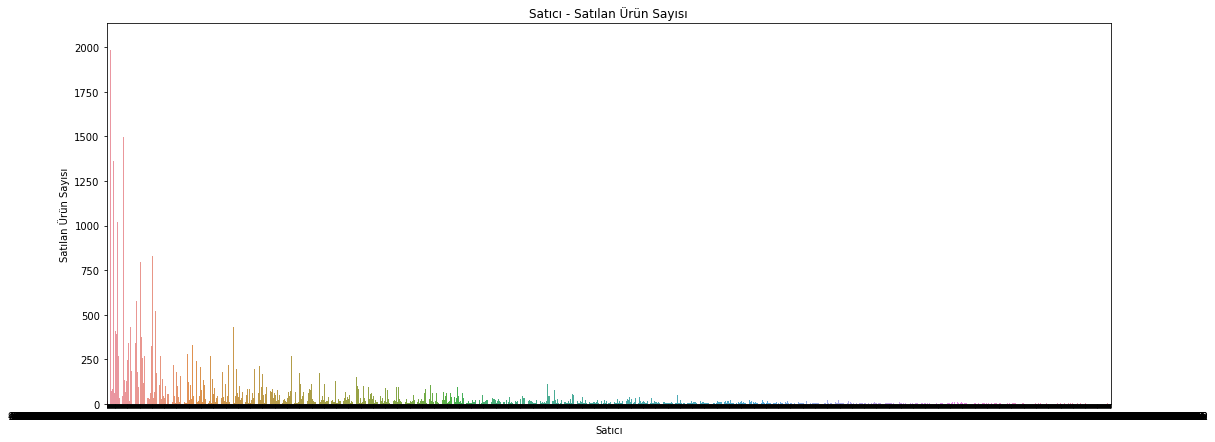

In [813]:
plt.figure(figsize = (18,7))
sns.countplot(x = 'satici_id', data = merg_data4)
plt.title('Satıcı - Satılan Ürün Sayısı')
plt.xlabel('Satıcı')
plt.ylabel('Satılan Ürün Sayısı')

<AxesSubplot: xlabel='satici_id,siparis_adet', ylabel='Galibiyet Sayısı'>

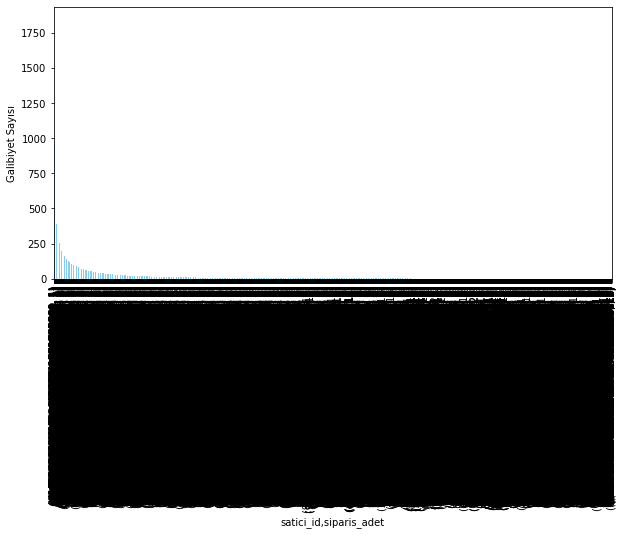

In [821]:
plt.figure(figsize=(10,5))
plt.ylabel('Galibiyet Sayısı')
#games.groupby("Sezon")["Ana_Takım_Kazanma"].value_counts().sort_values(ascending=False).plot.bar(width= 0.50, color="#87CEEB")
merg_data4.groupby("satici_id")["siparis_adet"].value_counts().sort_values(ascending=False).plot.bar(width= 0.50, color="#87CEEB")